# Salience by Political Leanings

This script provides the political leanings breakdown of the salience analysis. We have used it to produce the graphs and explore some trends in its evolution. The definition of the functions below allowed us to analyse the evolutions in different ways. Often the cells have been used multiple times to create m

In [89]:
import pandas as pd
import matplotlib.pyplot as plt 
from matplotlib.ticker import MultipleLocator
from collections import OrderedDict
import seaborn as sn

## Initialise

In [2]:
leanings = ['left','centre-left','centre','centre-right','right']
time_counts_df = pd.read_csv('/.../general_time_periods_df.csv')

In [3]:
time_counts_df.head(1)

,time_period,start_date,end_date
0,1,2017-01-01,2017-01-31


# MEDIA CLASSES

In [4]:
url_df=pd.read_csv('/.../0_media_france_UNIQUE_URL_SHARING_with_titles_debates_and_timeperiod_2017_2019.zip', compression = 'zip')
media_df = pd.read_csv('/.../0_FR_media_leanings.csv')

In [5]:
url_df.head(1)

,hashed_id,normalized_url,domain,datetime,normalized_url_phrases,debate,time_period,start_date,end_date
0,34aa3c64ece5d8f88c2db3e2163946b4,ouest-france.fr/bretagne/rennes-35000/rennes-i...,ouest-france.fr,2019-07-20 14:21:37,rennes ils tendent un guet apens aux pompiers ...,NaN,32,2019-07-20,2019-08-02


In [6]:
media_df.head(1)

,domain,audience_mean_lr,audience_mean_antielite,audience_mean_nationalism,audience_mean_eu,citations,LR_quintile,leaning
0,lemonde.fr,5.606975,6.821974,4.335522,5.711706,368932,1,centre-left


## Map media leanings into to url_df and sort df

In [7]:
url_df['media_leaning'] = url_df.domain.map(media_df.set_index('domain')['leaning'])

In [8]:
url_df['media_leaning'] = pd.Categorical(url_df['media_leaning'], categories=leanings, ordered=True)
url_df.sort_values(by='media_leaning', inplace = True)
url_df.reset_index(drop=True, inplace = True)

## Calculate counts and salience for each leaning

In [9]:
for leaning in leanings:
    temp_df = url_df[url_df.media_leaning == leaning]
    
    time_counts_df[f'imm_count_media_{leaning}'] = time_counts_df['time_period'].map(temp_df[temp_df['debate']=='immigration'].groupby('time_period').size())
    time_counts_df[f'clim_count_media_{leaning}'] = time_counts_df['time_period'].map(temp_df[temp_df['debate']=='climate'].groupby('time_period').size())
    time_counts_df[f'tot_articles_count_media_{leaning}']= time_counts_df['time_period'].map(temp_df.groupby('time_period').size())
    
    time_counts_df[f'imm_salience_media_{leaning}'] = time_counts_df[f'imm_count_media_{leaning}'] /time_counts_df[f'tot_articles_count_media_{leaning}']
    time_counts_df[f'clim_salience_media_{leaning}'] = time_counts_df[f'clim_count_media_{leaning}']/time_counts_df[f'tot_articles_count_media_{leaning}']

time_counts_df.fillna(0, inplace=True)

In [10]:
time_counts_df.head(3)

,time_period,start_date,end_date,imm_count_media_left,clim_count_media_left,tot_articles_count_media_left,imm_salience_media_left,clim_salience_media_left,imm_count_media_centre-left,clim_count_media_centre-left,...,imm_count_media_centre-right,clim_count_media_centre-right,tot_articles_count_media_centre-right,imm_salience_media_centre-right,clim_salience_media_centre-right,imm_count_media_right,clim_count_media_right,tot_articles_count_media_right,imm_salience_media_right,clim_salience_media_right
0,1,2017-01-01,2017-01-31,7,13,464,0.015086,0.028017,17,21,...,0.0,12,604,0.000000,0.019868,4,1.0,368,0.010870,0.002717
1,2,2017-01-31,2017-03-02,4,7,593,0.006745,0.011804,11,20,...,1.0,8,739,0.001353,0.010825,2,2.0,517,0.003868,0.003868
2,3,2017-03-02,2017-04-01,6,10,556,0.010791,0.017986,12,22,...,1.0,8,702,0.001425,0.011396,4,2.0,619,0.006462,0.003231


# POLITICAL PARTIES

Import Datasets

In [20]:
df_parties = pd.read_csv('/.../parties_tweets_with_topic_model_debates.zip',  compression ='zip')
party_leaning = pd.read_csv('/.../0_FR_party_leanings.csv')

/var/folders/zb/cxb4bvjs4x73pskfrpb9cpg40000gn/T/ipykernel_42502/80286985.py:1: DtypeWarning: Columns (45,46,47,48) have mixed types. Specify dtype option on import or set low_memory=False.
  df_parties = pd.read_csv('/Users/giovanni/masterthesis/7_Salience_monthly/parties_tweets_with_topic_model_debates.zip',  compression ='zip')


Map party_leaning column

In [21]:
df_parties['party_leaning'] = df_parties.party_name.map(party_leaning.set_index('party')['leaning'])

Reorder dataframe 

In [22]:
df_parties['party_leaning'] = pd.Categorical(df_parties['party_leaning'], categories=leanings, ordered=True)
df_parties.sort_values(by='party_leaning', inplace = True)
df_parties.reset_index(drop=True, inplace = True)

In [23]:
for leaning in leanings:
    temp_df = df_parties[df_parties.party_leaning == leaning]
    
    time_counts_df[f'imm_count_party_{leaning}'] = time_counts_df['time_period'].map(temp_df[temp_df['debate']=='immigration'].groupby('time_period').size())
    time_counts_df[f'clim_count_party_{leaning}'] = time_counts_df['time_period'].map(temp_df[temp_df['debate']=='climate'].groupby('time_period').size())
    time_counts_df[f'tot_tweets_count_party_{leaning}']= time_counts_df['time_period'].map(temp_df.groupby('time_period').size())
    
    time_counts_df[f'imm_salience_party_{leaning}'] = time_counts_df[f'imm_count_party_{leaning}'] /time_counts_df[f'tot_tweets_count_party_{leaning}']
    time_counts_df[f'clim_salience_party_{leaning}'] = time_counts_df[f'clim_count_party_{leaning}']/time_counts_df[f'tot_tweets_count_party_{leaning}']

time_counts_df.fillna(0, inplace=True)

# Save to Hard Drive

In [25]:
time_counts_df.to_csv('/.../4_media_and_party_salience_BY_CLASS_across_time_counts_.csv', index=False)

# Plot

In [28]:
plot_df = time_counts_df.copy()
plot_df['start_date'] = pd.to_datetime(plot_df['start_date'])
plot_df = plot_df.set_index('start_date')

In [8]:
colors = {'left':'red',
         'centre-left':'purple',
         'centre':'blue',
         'centre-right':'lightseagreen',
         'right': 'black'}

In [133]:
def plot_trends(column, actor, leanings_to_plot, debate, max_y):
    fig, ax1 = plt.subplots(figsize=(10, 4))

    for leaning in leanings_to_plot:
        ax1.plot(plot_df[f'{column}_{actor}_{leaning}'], linestyle='-', color=colors[leaning], label=leaning)
    
    ax1.axvline(x=pd.to_datetime('2017-05-07'), color='r', linestyle=':', linewidth=2)
    ax1.text(pd.to_datetime('2017-05-07'), max_y * 0.8, ' 2017 presidential election', verticalalignment='bottom', color='r')
    
    ax1.axvline(x=pd.to_datetime('2019-05-26'), color='r', linestyle=':', linewidth=2)
    ax1.text(pd.to_datetime('2019-05-26'), max_y * 0.8, ' 2019 EU election', verticalalignment='bottom', color='r')
    
    if debate == 'climate':
        ax1.axvline(x=pd.to_datetime('2017-11-17'), color='g', linestyle=':', linewidth=2)
        ax1.text(pd.to_datetime('2017-11-17'), max_y * 0.9, ' COP 2017', verticalalignment='bottom', color='g')
        ax1.axvline(x=pd.to_datetime('2018-12-14'), color='g', linestyle=':', linewidth=2)
        ax1.text(pd.to_datetime('2018-12-14'), max_y * 0.9, ' COP 2018', verticalalignment='bottom', color='g')

        ax1.axvspan(pd.to_datetime('2019-01-15'), pd.to_datetime('2019-05-24'), color='g', alpha=0.2)
        interval_start = pd.to_datetime('2019-01-15')
        interval_end = pd.to_datetime('2019-05-24')
        interval_label = 'Youth for climate'  # Customize the label as per your requirement
        interval_center = interval_start + (interval_end - interval_start) / 2
        ax1.text(interval_center, max_y * 1.01, interval_label, horizontalalignment='center', color='g')
        
        ax1.axvline(x=pd.to_datetime('2018-08-04'), color='g', linestyle=':', linewidth=2)
        ax1.text(pd.to_datetime('2018-08-04'), max_y * 0.7, ' 2018 heat wave', verticalalignment='bottom', color='g')
        ax1.axvline(x=pd.to_datetime('2018-10-17'), color='g', linestyle=':', linewidth=2)
        ax1.text(pd.to_datetime('2018-10-17'), max_y * 0.8, ' Yellow vests', verticalalignment='bottom', color='g')
        
        
    if debate == 'immigration':
        ax1.axvline(x=pd.to_datetime('2018-12-19'), color='black', linestyle=':', linewidth=2)
        ax1.text(pd.to_datetime('2018-12-19'), max_y * 0.5, ' Marrakech Pact', verticalalignment='bottom', color='black')
        ax1.axvline(x=pd.to_datetime('2018-08-01'), color='black', linestyle=':', linewidth=2)
        ax1.text(pd.to_datetime('2018-08-01'), max_y * 0.85, ' Immigration law passed', verticalalignment='bottom', color='black')
        ax1.axvline(x=pd.to_datetime('2018-04-20'), color='black', linestyle=':', linewidth=2)
        ax1.text(pd.to_datetime('2018-04-20'), max_y * 0.94, ' Immigration law 1st reading', verticalalignment='bottom', color='black')

    ax1.set_xlabel('Date')
    ax1.set_ylabel('Salience', color='black')
    ax1.tick_params(axis='y', labelcolor='black')
    ax1.grid(True)
    ax1.set_ylim(0, max_y) 

    fig.legend(loc='right',bbox_to_anchor=(1.05,0.5))
    plt.setp(ax1.get_xticklabels(), rotation=90)
    if len(leanings_to_plot) == 5:
        plt.title(f'Salience of {debate} over time – {actor} (All)')
    else: 
        plt.title(f'Salience of {debate} over time – {actor} {leanings_to_plot}')
    plt.show()

In [51]:
def compare_trends(column, leaning, debate):
    fig, ax1 = plt.subplots(figsize=(10, 4))
    
    ax1.plot(plot_df[f'{column}_media_{leaning}'], linestyle='-', color='gold', label=f'Media - {leaning}')
    ax1.plot(plot_df[f'{column}_party_{leaning}'], linestyle='-', color='black', label=f'Parties - {leaning}')
        
    ax1.set_xlabel('Date', color = colors[leaning])
    ax1.set_ylabel('Salience', color=colors[leaning])
    ax1.tick_params(axis='y', labelcolor=colors[leaning])
    ax1.grid(True)

    fig.legend(loc='right',bbox_to_anchor=(1.05,0.5))
    plt.setp(ax1.get_xticklabels(), rotation=90, color=colors[leaning])
    plt.title(f'Comparison of media and parties salience of {debate} – {leaning}', color=colors[leaning])

    plt.show()

## Media

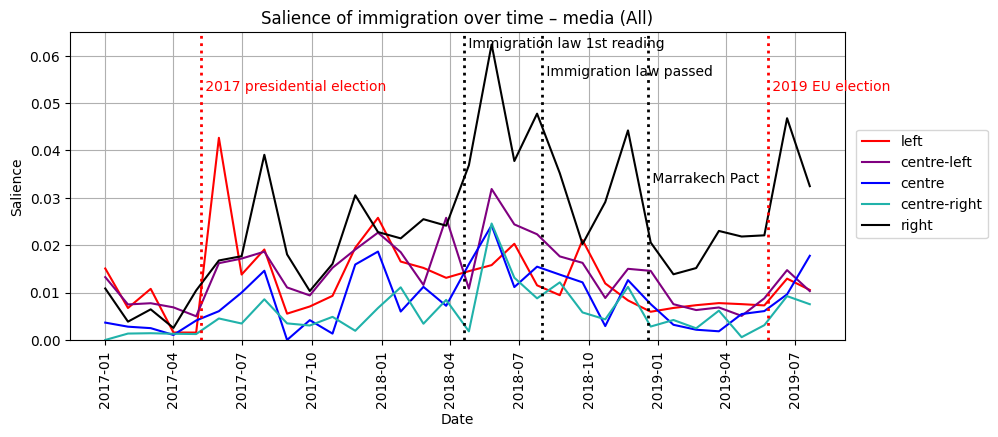

In [93]:
plot_trends('imm_salience', actor='media', leanings_to_plot=leanings, 
            debate='immigration', max_y=0.065)

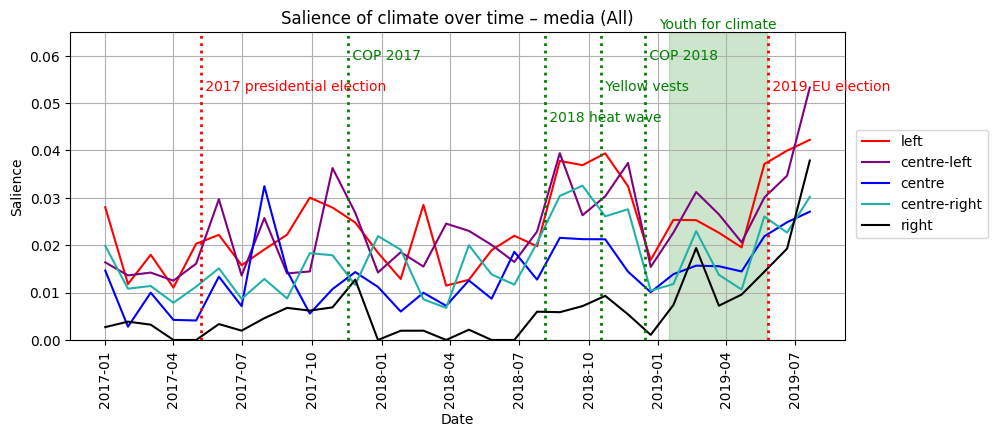

In [134]:
plot_trends('clim_salience', actor='media', leanings_to_plot=leanings, 
            debate='climate', max_y=0.065)

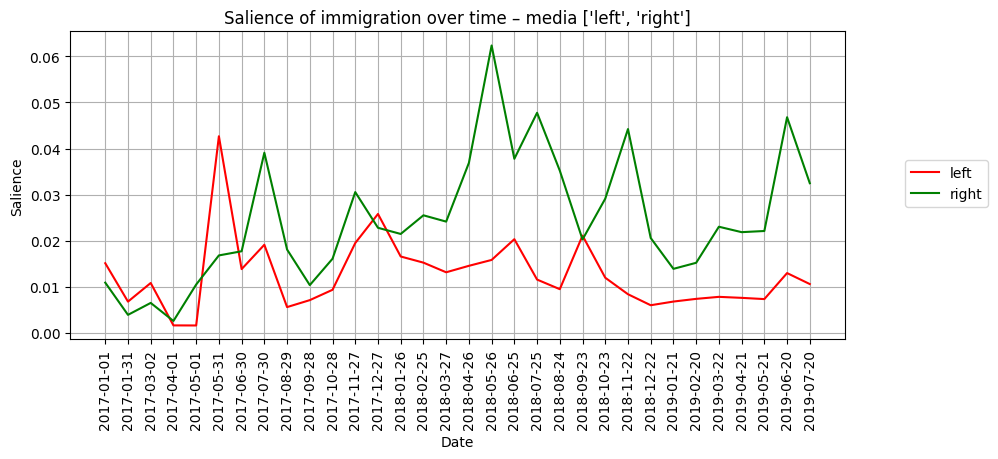

In [50]:
plot_trends('imm_salience', actor='media', 
            leanings_to_plot=['left','right'], debate='immigration')

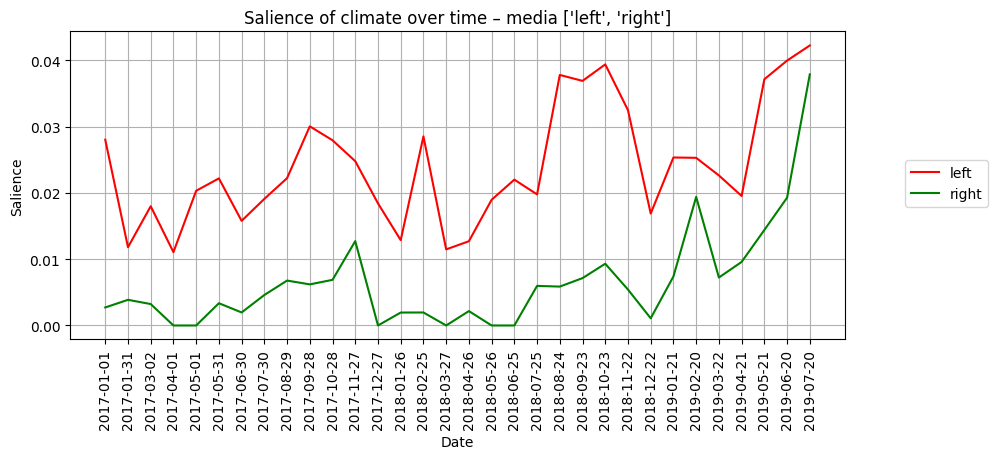

In [51]:
plot_trends('clim_salience', actor='media', 
            leanings_to_plot=['left','right'], debate='climate')

## Parties

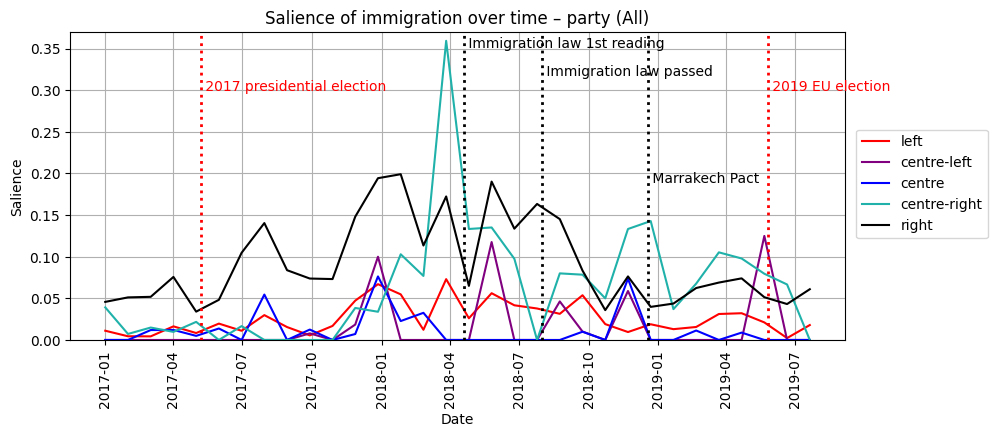

In [84]:
plot_trends('imm_salience', actor='party', 
            leanings_to_plot=leanings, debate='immigration', max_y=0.37)

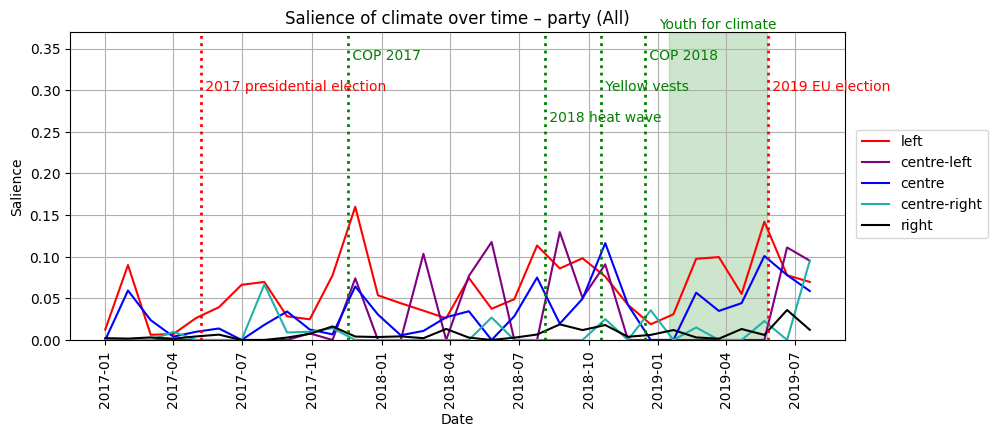

In [135]:
plot_trends('clim_salience', actor='party', 
            leanings_to_plot=leanings, debate='climate', max_y=0.37)

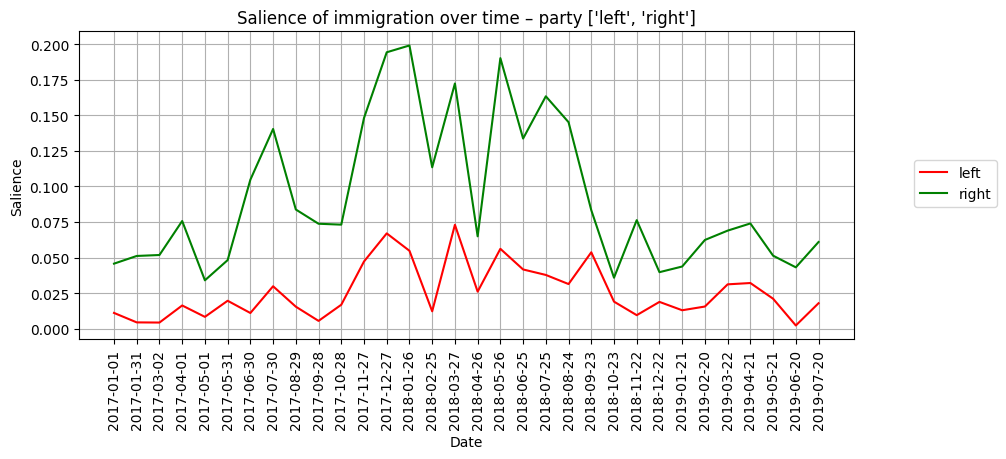

In [53]:
plot_trends('imm_salience', actor='party', 
            leanings_to_plot=['left','right'], debate='immigration')

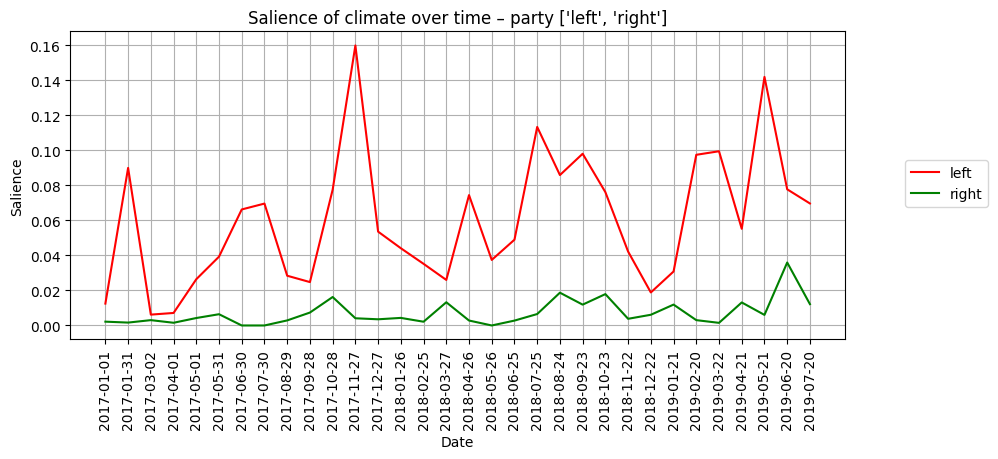

In [54]:
plot_trends('clim_salience', actor='party', 
            leanings_to_plot=['left','right'], debate='climate')

## Compare

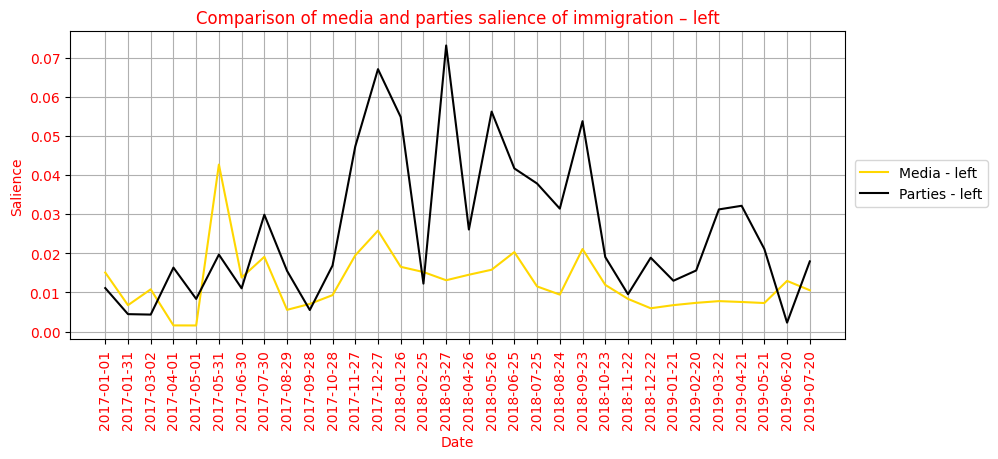

In [43]:
compare_trends(column = 'imm_salience', leaning = 'left', debate='immigration')

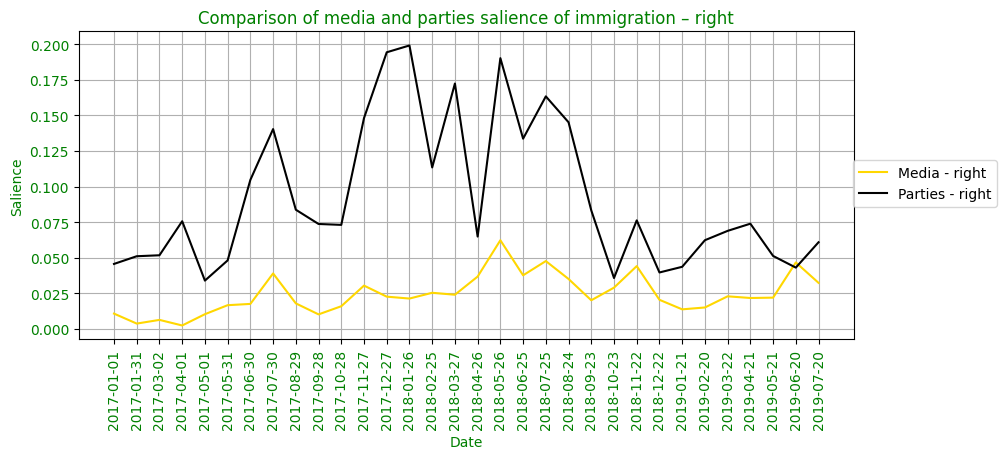

In [44]:
compare_trends(column = 'imm_salience', leaning = 'right', debate='immigration')

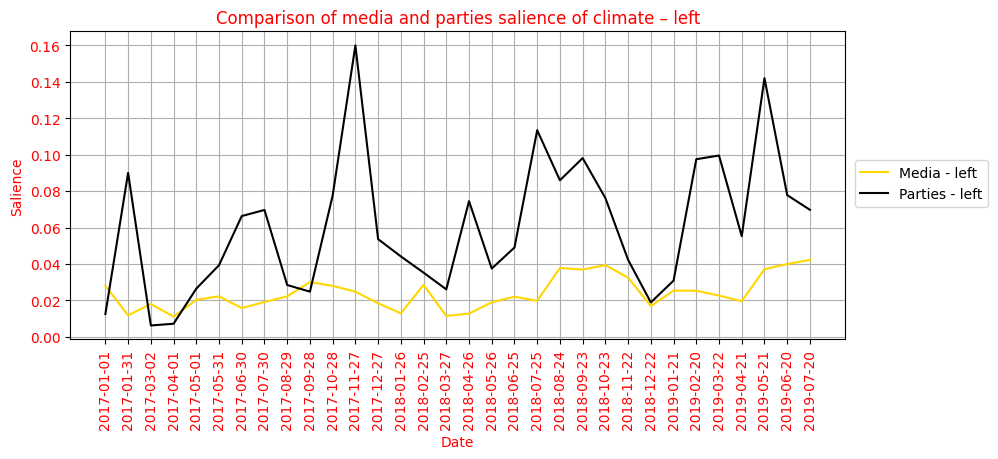

In [45]:
compare_trends(column = 'clim_salience', leaning = 'left', debate='climate')

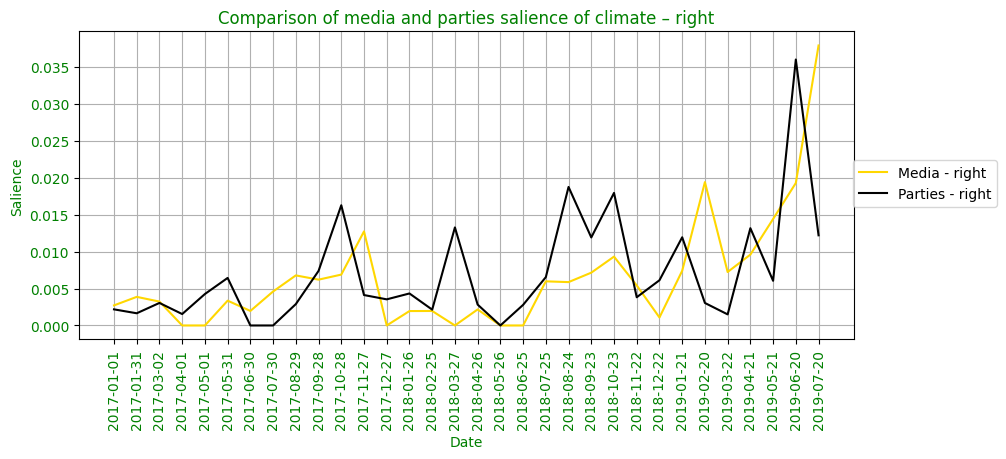

In [47]:
compare_trends(column = 'clim_salience', leaning = 'right', debate='climate')